In [1]:
!pip install statsmodels seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 50)

# 1) LOAD DATA
file_path = "/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603 (3).csv"
df = pd.read_csv(file_path)

# 2) BASIC CLEANING
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)

service_cols = ['Local Route','Light Rail','Peak Service','Rapid Route','School','Other']
df['Total'] = df[service_cols].sum(axis=1)

print("Rows:", len(df))
print("Date range:", df['Date'].min(), "→", df['Date'].max())
df.head()


Rows: 1918
Date range: 2019-07-01 00:00:00 → 2024-09-29 00:00:00


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
0,2019-07-01,15987,9962,407,21223,3715,NaN,51294.0
1,2019-07-02,16895,10656,409,21715,3993,NaN,53668.0
2,2019-07-03,16613,10658,427,22025,3638,NaN,53361.0
3,2019-07-04,16604,10445,437,21868,3576,NaN,52930.0
4,2019-07-05,16040,10532,400,20697,2856,NaN,50525.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Local Route'].plot(kind='hist', bins=20, title='Local Route')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Light Rail'].plot(kind='hist', bins=20, title='Light Rail')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Peak Service'].plot(kind='hist', bins=20, title='Peak Service')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Local Route', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Local Route', y='Light Rail', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Light Rail', y='Peak Service', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Peak Service', y='Rapid Route', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Local Route']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Local Route')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Light Rail']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Light Rail')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Peak Service']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Peak Service')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Rapid Route']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Rapid Route')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Local Route'].plot(kind='line', figsize=(8, 4), title='Local Route')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Light Rail'].plot(kind='line', figsize=(8, 4), title='Light Rail')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Peak Service'].plot(kind='line', figsize=(8, 4), title='Peak Service')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:

history = df.tail(180).copy()
history.set_index('Date', inplace=True)

services_to_model = ['Local Route','Light Rail','Peak Service','Rapid Route','School']

def fit_arima_111(series):
    """Fit ARIMA(1,1,1) and return fitted model."""
    s = series.astype(float).fillna(0)
    # very short / all-zero safeguard
    if len(s) < 30 or (s == 0).all():
        return None
    model = ARIMA(s, order=(1,1,1))
    return model.fit()

arima_models = {}
for svc in services_to_model:
    arima_models[svc] = fit_arima_111(history[svc])
    print(f"{svc}: model {'OK' if arima_models[svc] is not None else 'SKIPPED'}")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Local Route: model OK


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Light Rail: model OK
Peak Service: model OK


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Rapid Route: model OK
School: model OK


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [3]:
# FORECAST HORIZON: NEXT 7 DAYS AFTER LAST DATE
start_date = df['Date'].max() + timedelta(days=1)
forecast_index = pd.date_range(start=start_date, periods=7, freq='D')

forecast_df = pd.DataFrame({'Date': forecast_index})

def forecast_arima(model, steps=7, fallback_mean=0):
    if model is None:
        return np.full(steps, fallback_mean)
    fc = model.forecast(steps=steps)
    return np.maximum(fc, 0)  # no negative passengers

for svc in services_to_model:
    model = arima_models[svc]
    mean_val = history[svc].mean()
    forecast_df[svc] = forecast_arima(model, steps=7, fallback_mean=mean_val).round().astype(int)

forecast_df['Total'] = forecast_df[services_to_model].sum(axis=1)
forecast_df['Weekday'] = forecast_df['Date'].dt.day_name()

print("7‑DAY FORECAST:")
forecast_df


7‑DAY FORECAST:


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Total,Weekday
0,2024-09-30,NaN,NaN,NaN,NaN,NaN,0.0,Monday
1,2024-10-01,NaN,NaN,NaN,NaN,NaN,0.0,Tuesday
2,2024-10-02,NaN,NaN,NaN,NaN,NaN,0.0,Wednesday
3,2024-10-03,NaN,NaN,NaN,NaN,NaN,0.0,Thursday
4,2024-10-04,NaN,NaN,NaN,NaN,NaN,0.0,Friday
5,2024-10-05,NaN,NaN,NaN,NaN,NaN,0.0,Saturday
6,2024-10-06,NaN,NaN,NaN,NaN,NaN,0.0,Sunday


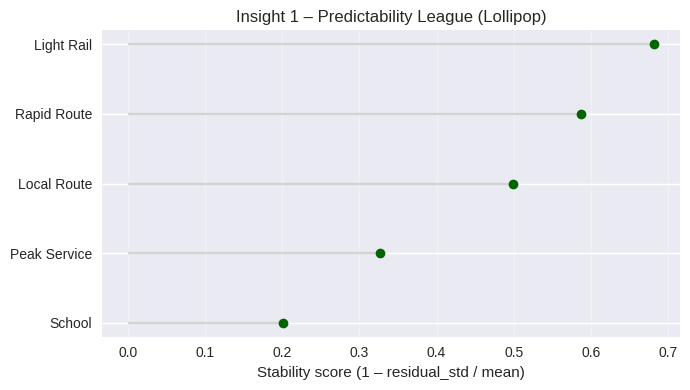

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# compute stability_scores as before
stability_scores = {}
for svc in services_to_model:
    model = arima_models[svc]
    if model is None:
        stability_scores[svc] = np.nan
        continue
    resid = model.resid
    mean_demand = history[svc].mean()
    stability_scores[svc] = 1 - (resid.std() / mean_demand)

stab_ser = pd.Series(stability_scores).sort_values(ascending=True)

plt.figure(figsize=(7,4))
x = np.arange(len(stab_ser))
plt.hlines(y=x, xmin=0, xmax=stab_ser.values, color='lightgray')
plt.plot(stab_ser.values, x, "o", color='darkgreen')
plt.yticks(x, stab_ser.index)
plt.xlabel("Stability score (1 – residual_std / mean)")
plt.title("Insight 1 – Predictability League (Lollipop)")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


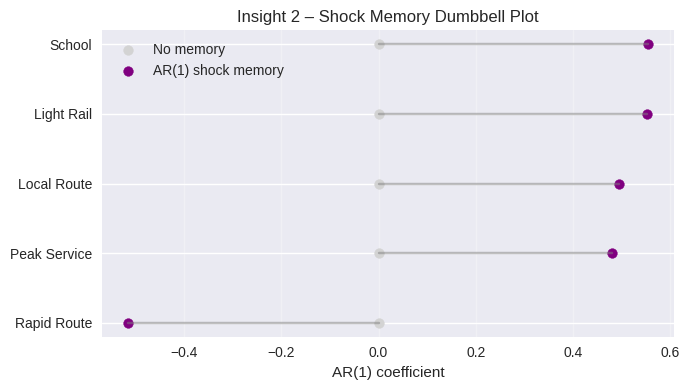

In [6]:
shock_persistence = {}
for svc in services_to_model:
    model = arima_models[svc]
    if model is None or len(model.arparams) == 0:
        shock_persistence[svc] = np.nan
        continue
    shock_persistence[svc] = model.arparams[0]

shock_ser = pd.Series(shock_persistence).sort_values(ascending=True)

plt.figure(figsize=(7,4))
y = np.arange(len(shock_ser))
# 0 baseline
plt.scatter(np.zeros_like(shock_ser.values), y, color='lightgray', label='No memory')
# actual AR(1)
plt.scatter(shock_ser.values, y, color='purple', label='AR(1) shock memory')

for i, val in enumerate(shock_ser.values):
    plt.plot([0, val], [y[i], y[i]], color='gray', alpha=0.5)

plt.yticks(y, shock_ser.index)
plt.xlabel("AR(1) coefficient")
plt.title("Insight 2 – Shock Memory Dumbbell Plot")
plt.grid(axis='x', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


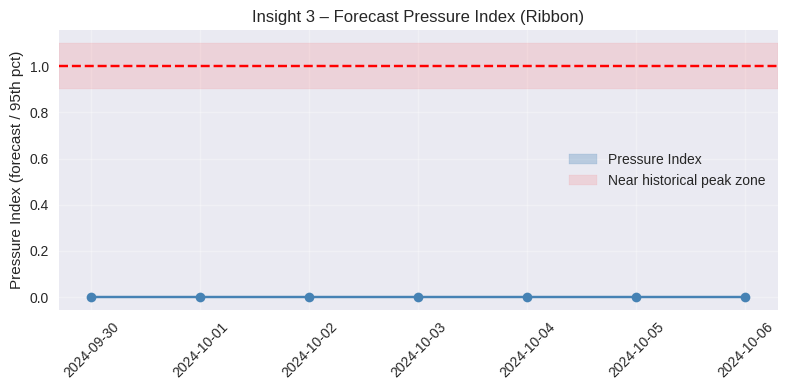

In [7]:
p95 = df['Total'].quantile(0.95)
forecast_df['PressureIndex'] = forecast_df['Total'] / p95

plt.figure(figsize=(8,4))
x = forecast_df['Date']
y = forecast_df['PressureIndex']

plt.fill_between(x, y, 0, color='steelblue', alpha=0.3, label='Pressure Index')
plt.plot(x, y, color='steelblue', marker='o')
plt.axhspan(0.9, 1.1, color='red', alpha=0.1, label='Near historical peak zone')
plt.axhline(1.0, color='red', linestyle='--')

plt.title("Insight 3 – Forecast Pressure Index (Ribbon)")
plt.ylabel("Pressure Index (forecast / 95th pct)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2148897100.py:7: RuntimeWarning: invalid value encountered in scalar divide
  rapid_fc_share = fc_totals['Rapid Route'] / fc_totals['Total'] * 100
/tmp/ipython-input-2148897100.py:8: RuntimeWarning: invalid value encountered in scalar divide
  local_fc_share = fc_totals['Local Route'] / fc_totals['Total'] * 100


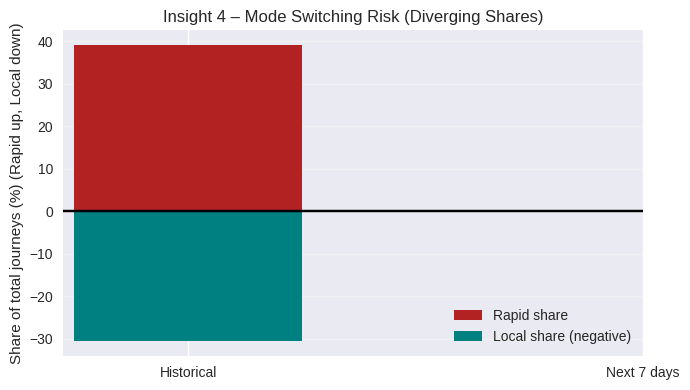

In [8]:
# shares as before
hist_totals = df[['Rapid Route','Local Route','Total']].sum()
rapid_hist_share = hist_totals['Rapid Route'] / hist_totals['Total'] * 100
local_hist_share = hist_totals['Local Route'] / hist_totals['Total'] * 100

fc_totals = forecast_df[['Rapid Route','Local Route','Total']].sum()
rapid_fc_share = fc_totals['Rapid Route'] / fc_totals['Total'] * 100
local_fc_share = fc_totals['Local Route'] / fc_totals['Total'] * 100

plot_df = pd.DataFrame({
    'Period': ['Historical','Next 7 days'],
    'RapidShare': [rapid_hist_share, rapid_fc_share],
    'LocalShare': [local_hist_share, local_fc_share]
})

x = np.arange(len(plot_df))

plt.figure(figsize=(7,4))
# diverging from 0: Rapid to the right, Local to the left
plt.bar(x, plot_df['RapidShare'], width=0.5, color='firebrick', label='Rapid share')
plt.bar(x, -plot_df['LocalShare'], width=0.5, color='teal', label='Local share (negative)')

plt.axhline(0, color='black')
plt.xticks(x, plot_df['Period'])
plt.ylabel("Share of total journeys (%) (Rapid up, Local down)")
plt.title("Insight 4 – Mode Switching Risk (Diverging Shares)")
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


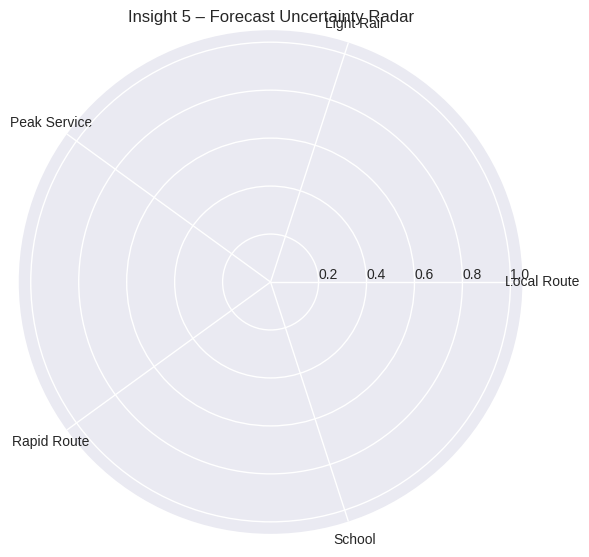

Relative uncertainty (CI width / mean forecast):
 Local Route    NaN
Light Rail     NaN
Peak Service   NaN
Rapid Route    NaN
School         NaN
dtype: float64


In [9]:
def compute_relative_uncertainty(svc):
    model = arima_models[svc]
    if model is None:
        return np.nan
    fc = model.get_forecast(steps=7)
    ci = fc.conf_int(alpha=0.05)
    cols = ci.columns
    lower, upper = ci[cols[0]], ci[cols[1]]
    mean_width = (upper - lower).mean()
    mean_forecast = forecast_df[svc].mean()
    return (mean_width / mean_forecast) if mean_forecast > 0 else np.nan

uncertainty = {svc: compute_relative_uncertainty(svc) for svc in services_to_model}
unc_ser = pd.Series(uncertainty)

# Radar setup
labels = unc_ser.index.tolist()
values = unc_ser.values
# close the loop
labels += [labels[0]]
values = np.append(values, values[0])

angles = np.linspace(0, 2*np.pi, len(labels))

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2, color='darkorange')
ax.fill(angles, values, alpha=0.25, color='darkorange')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(unc_ser.index)
ax.set_title("Insight 5 – Forecast Uncertainty Radar")
ax.set_rlabel_position(0)
plt.tight_layout()
plt.show()

print("Relative uncertainty (CI width / mean forecast):\n", unc_ser)
